In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data
data = pd.read_csv('../datasets/train.csv')

In [3]:
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
pd.set_option('display.max_rows', 100)

In [5]:
# view data types
print(data.dtypes)

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [6]:
data.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# change column names to snake case
data.columns = data.columns.str.lower()
data.columns = [column.replace(' ', '_') for column in data.columns]

/home/mark/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


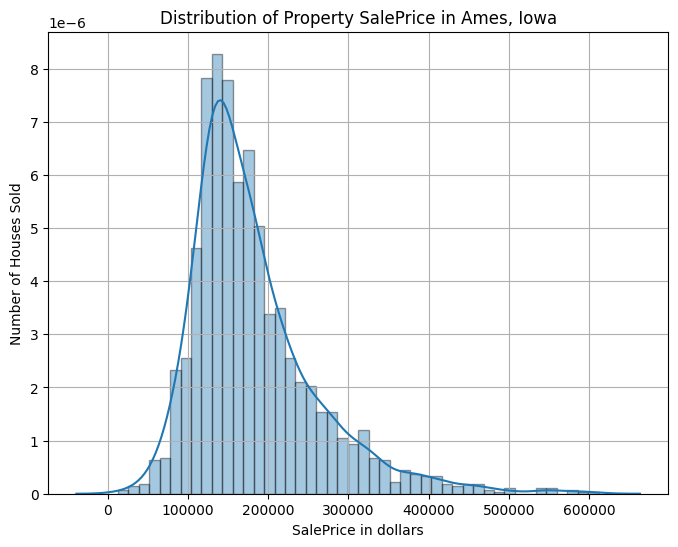

In [39]:
# look at saleprice
plt.figure(figsize=(8,6))
sns.distplot(data['saleprice'], hist_kws=dict (edgecolor='black'))
plt.title('Distribution of Property SalePrice in Ames, Iowa')
plt.xlabel('SalePrice in dollars')
plt.ylabel('Number of Houses Sold')
plt.grid()
plt.show()

In [9]:
# look at some correlations
numeric = ['int64', 'float64']
numeric_data = data.select_dtypes(include=numeric)
corr = numeric_data.corr()
corr[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.650270
garage_cars,0.648220
total_bsmt_sf,0.628925
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


### Dealing with Missing Values

In [10]:
# check for null values
data.isna().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

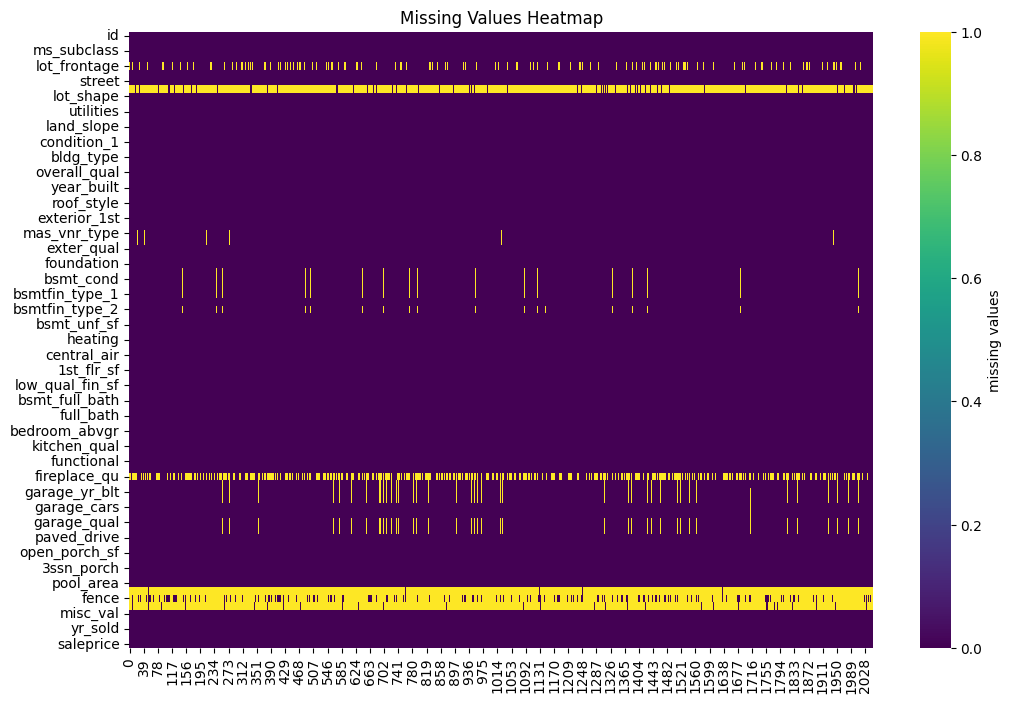

In [11]:
# visualize missing data
plt.figure(figsize=(12,8))
sns.heatmap(data.isna().transpose(), cmap='viridis', cbar_kws={'label': 'missing values'})
plt.title('Missing Values Heatmap');

In [12]:
# identify columns that have greater than 1/3 of their values missing
missing_columns = [column for column in data if data.loc[:,column].isna().sum() > 684]
missing_columns

['alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature']

In [13]:
# 'fence' column may be useful if missing values are replaced with category 'NoFence'
data['fence'].fillna('nofence', inplace=True)

In [14]:
# reidentify missing columns
missing_columns = [column for column in data if data.loc[:,column].isna().sum() > 684]
missing_columns

['alley', 'fireplace_qu', 'pool_qc', 'misc_feature']

In [15]:
# remove columns with too many missing values. Imputing these would be assuming too much data
data.drop(columns = missing_columns, inplace=True)

In [16]:
# look at lot_frontage correlation with saleprice
data[['lot_frontage', 'saleprice']].corr()

,lot_frontage,saleprice
lot_frontage,1.000000,0.341842
saleprice,0.341842,1.000000


Text(0.5, 1.0, 'Relationship between Lot Frontage and SalePrice')

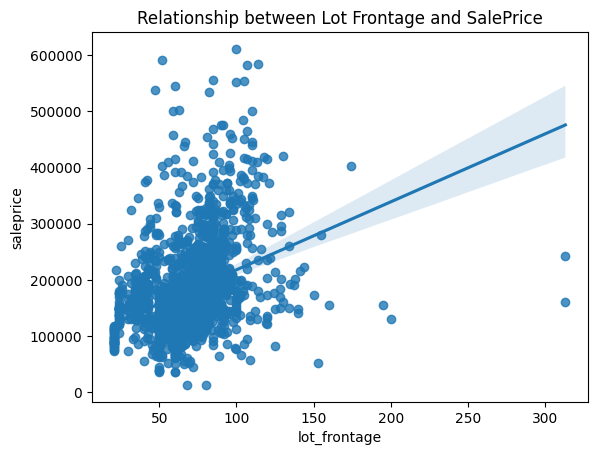

In [17]:
# plot of saleprice vs lot_frontage. The relationship does not seem particularly strong but it does exist
sns.regplot(x=data['lot_frontage'], y=data['saleprice'])
plt.title('Relationship between Lot Frontage and SalePrice')

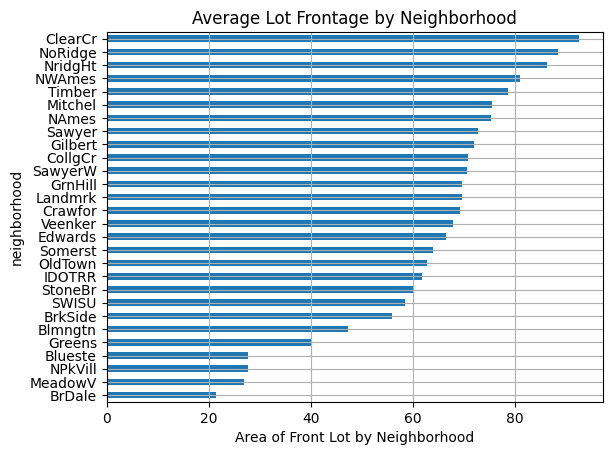

In [43]:
# visualize average sale price by subclass
lot_area = data.groupby('neighborhood')['lot_frontage'].mean()
lot_area.sort_values(inplace=True)
plt.xlabel('Area of Front Lot by Neighborhood')
plt.grid()
lot_area.plot(grid=True, kind='barh', title='Average Lot Frontage by Neighborhood', yticks=list(range(0, 400000, 50000)));

In [18]:
# a correlation of 0.34 with saleprice seems worth considering. Impute with mean of neighborhood
lot_means = data.groupby('neighborhood')['lot_frontage'].mean()

for i in range(len(data)):
    if np.isnan(data.loc[i, 'lot_frontage']):
        data.loc[i, 'lot_frontage'] = lot_means[data.loc[i, 'neighborhood']]

In [19]:
# fill remaining lot_frontage values with overall mean
lot_mean = np.mean(data['lot_frontage'])
data['lot_frontage'].fillna(lot_mean, inplace=True)

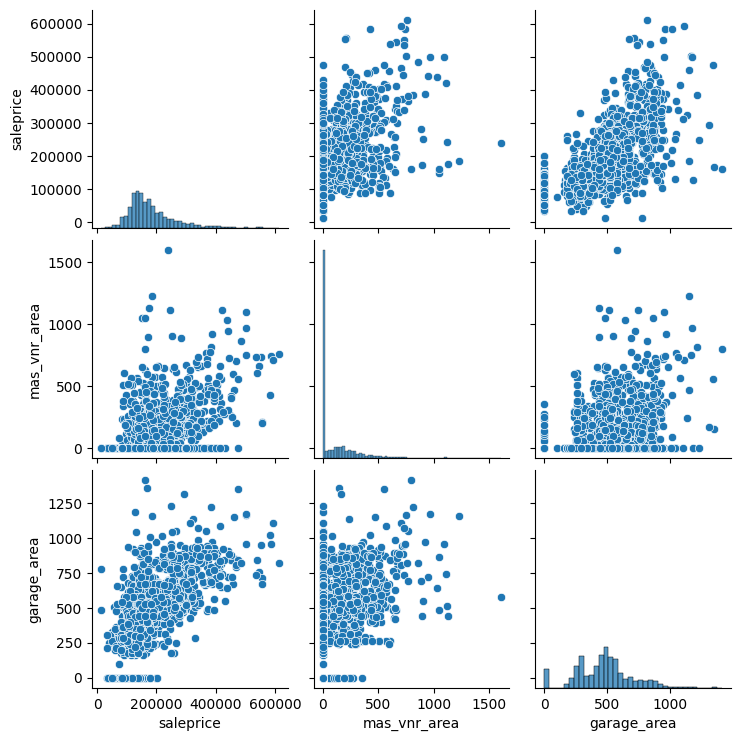

In [20]:
# look at mas_vnr_area and garage_area
sns.pairplot(data[['saleprice', 'mas_vnr_area', 'garage_area']])

In [21]:
# mas_vnr_area seems to have too many zeroes to be useful. garage_area seems more related. remove mas_vnr_area and mas_vnr_type
data.drop(columns = ['mas_vnr_type', 'mas_vnr_area'], inplace=True)

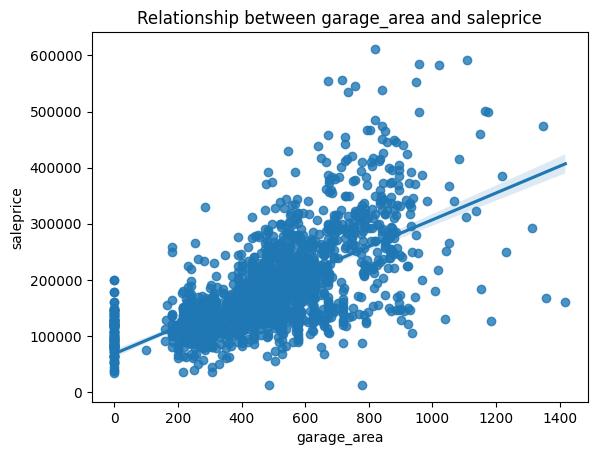

In [22]:
# look at garage_area
sns.regplot(x=data['garage_area'], y=data['saleprice'])
plt.title('Relationship between garage_area and saleprice');

In [23]:
# remove rows with over a certain amount of null values (6), some of these are the only missing value for the column

index_list = []
for i in range(len(data)):
    if data.isnull().sum(axis=1)[i] > 6:
        index_list.append(i)
index_list


[114, 256, 437, 580, 616, 700, 1098, 1327, 1428, 1594, 2010]

In [24]:
# drop rows
data.drop(data.index[index_list], inplace=True)

In [25]:
# fill final missing garage_area with 0. 0 is common in this column since not all properties have garages
data['garage_area'].fillna(0, inplace=True)

### Dealing with Outliers

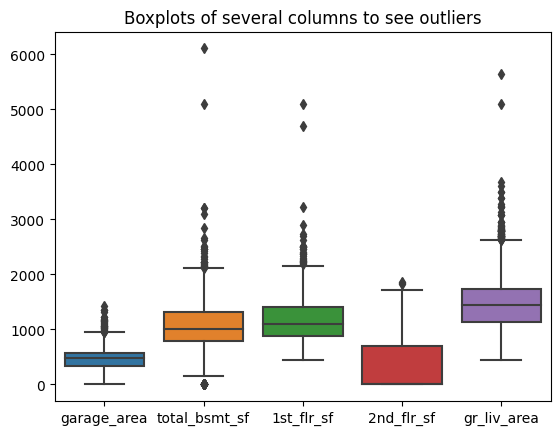

In [26]:
# take a look at some area columns that may have outliers
sns.boxplot(data[['garage_area', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','gr_liv_area']])
plt.title('Boxplots of several columns to see outliers');

In [27]:
# set quantiles for our data
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [28]:
# Count some outliers
print('total_bsmt_sf:',data['total_bsmt_sf'][data['total_bsmt_sf'] > Q3['total_bsmt_sf']].count())
print('garage_area:',data['garage_area'][data['garage_area'] > Q3['garage_area']].count())
print('1st_flr_sf:',data['1st_flr_sf'][data['1st_flr_sf'] > Q3['1st_flr_sf']].count())
print('2nd_flr_sf:',data['2nd_flr_sf'][data['2nd_flr_sf'] > Q3['2nd_flr_sf']].count())
print('gr_liv_area:',data['gr_liv_area'][data['gr_liv_area'] > Q3['gr_liv_area']].count())

total_bsmt_sf: 508
garage_area: 502
1st_flr_sf: 510
2nd_flr_sf: 510
gr_liv_area: 510


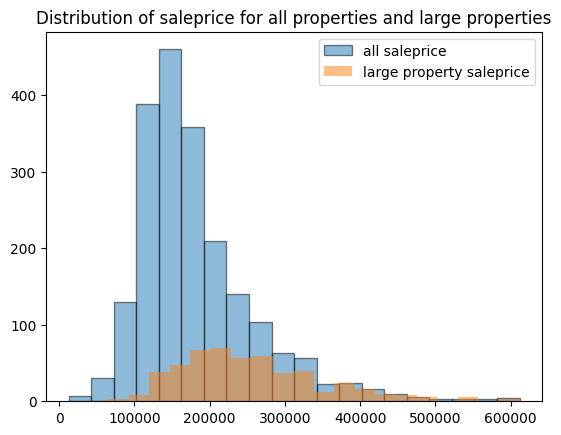

In [44]:
# Plot saleprice of large outlier properties to see if it reflects the size
y = data['saleprice'][data['1st_flr_sf'] > Q3['1st_flr_sf']]
x = data['saleprice']
plt.hist(x, bins=20, alpha=0.5, label='all saleprice', edgecolor='black')
plt.hist(y, bins=20, alpha=0.5, label='large property saleprice')
plt.legend(loc='upper right')
plt.title('Distribution of saleprice for all properties and large properties')
plt.show()

### Interpretation
It appears to be the same approximately 500 houses that are outliers in these categories. It appears these are simply larger properties, and have a relatively high saleprice compared to all saleprices. Since there will likely be larger properties in our test data, I believe these represent the actual data and should be left in

Since we likely have too much data to begin with, and further imputation would be extensive, columns that still have missing values will be dropped for now. Depending on the performance of the model these columns may be revisited.

In [30]:
# drop remaining columns with missing values
data.dropna(axis=1, inplace=True)

In [33]:
data.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'exter_qual', 'exter_cond', 'foundation',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'garage_area', 'paved_drive', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'fence', 'misc_val', 'mo_sold', 'yr_sold', 'sale_type

In [32]:
# write cleaned data to new csv
data.to_csv('../datasets/train_clean.csv')